In [3]:
# The imports
import pickle as pkl
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# Load the data
data_tissue = h5py.File("/u/dutilfra/milatmp1/transcriptome/graph/dataset.hdf5", 'r')
data_brca = h5py.File("/data/lisa/data/genomics/TCGA/BRCA_coexpr.hdf5", 'r')


In [44]:
def show_features(path, data):
    
    # load the features
    if '.pkl' not in path:
        path += '/features.pkl'
    
    features = pkl.load(open(path))

    
    for i, layer in enumerate(features):
        print "For layer", i
        for k, v in layer.iteritems():
            print "For class", k
            # Get the best features
            node_name, node_idx = v
            idx = np.array(range(len(node_name)))
            # Get the correspinding gene value for positiv dans negative
            class_idx = data['labels_data'].attrs[k]
            pos = np.array(data['expression_data'])[np.array(data['labels_data'][:, class_idx] == 1)].mean(axis=0)
            neg = np.array(data['expression_data'])[np.array(data['labels_data'][:, class_idx] == 0)].mean(axis=0)

            plt.bar(idx, height=pos[node_idx], label='From {}'.format(k)) # plt.bar don't like me :(
            plt.bar(idx + 0.25, height=neg[node_idx], label='Not from {}'.format(k))
            plt.legend()
            plt.xticks(range(len(node_name)), node_name, rotation='vertical')
            plt.show()

For layer 0
For class Cervix


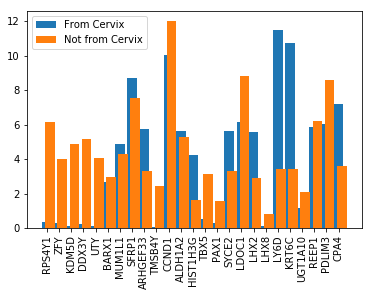

For class Testis


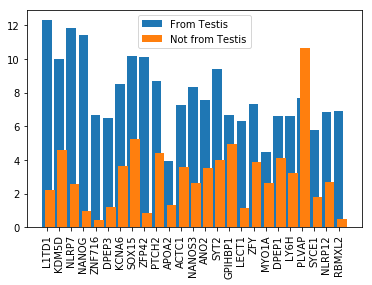

For class Eye


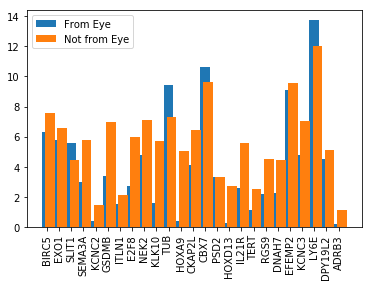

For class Head and Neck region


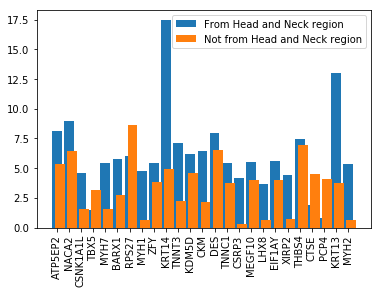

For class Adrenal gland


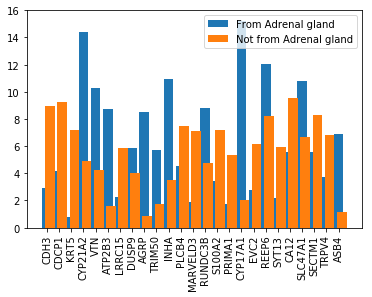

For class Stomach


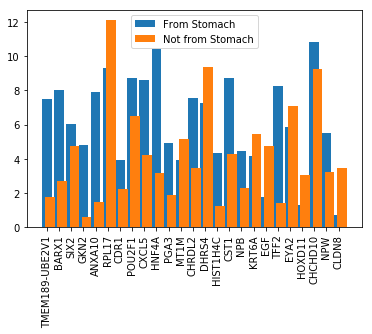

For class Bladder


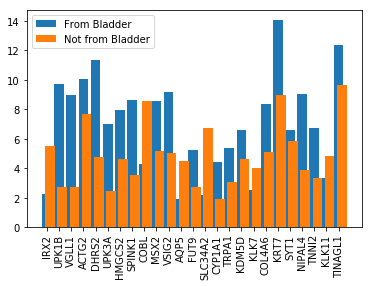

For class Lymphatic tissue


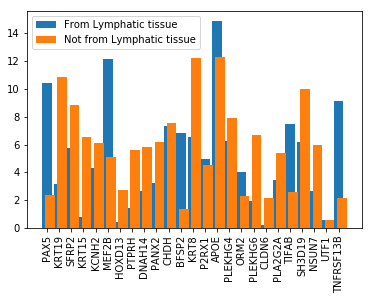

For class Breast


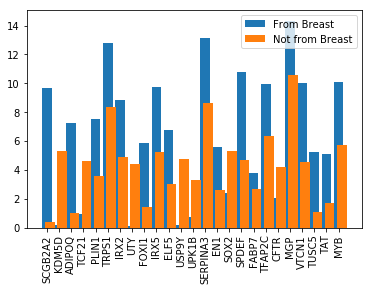

For class Colon


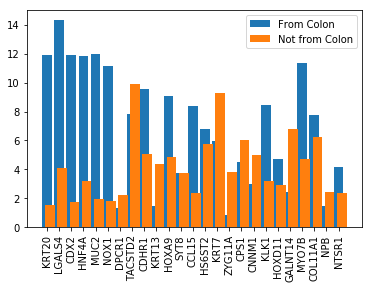

For class Rectum


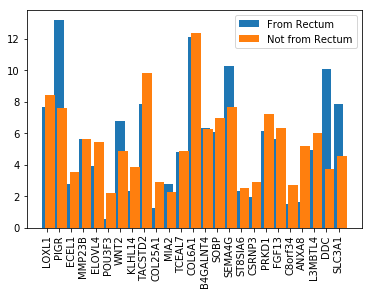

For class Prostate


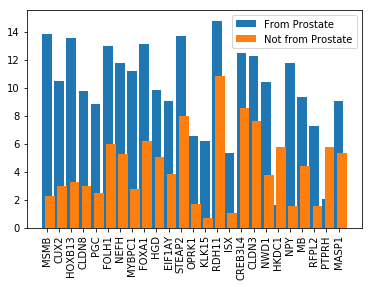

For class Liver


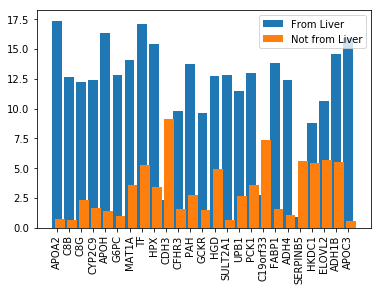

For class Lining of body cavities


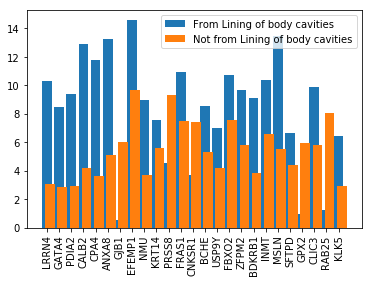

For class Thymus


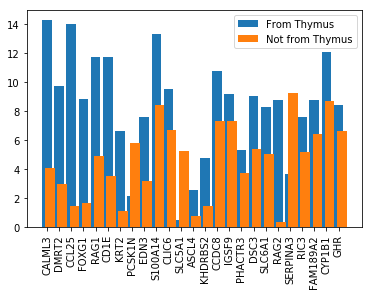

For class Uterus


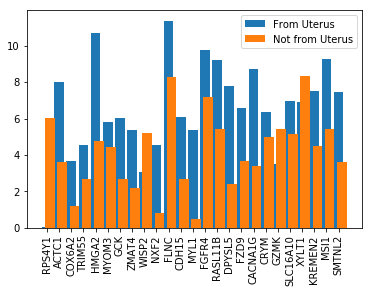

For class Ovary


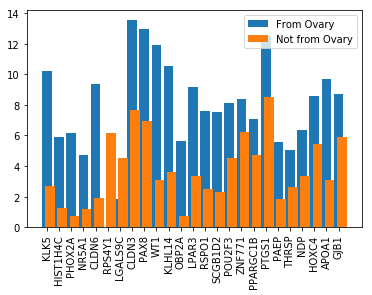

For class White blood cell


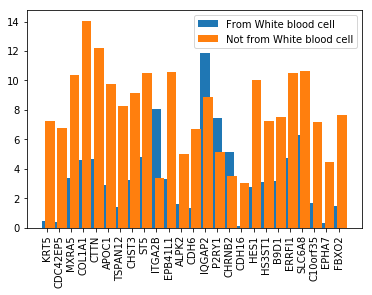

For class Soft tissue,Bone


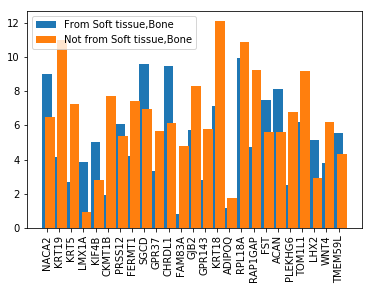

For class Bile duct


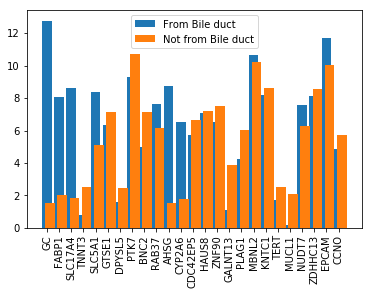

For class Paraganglia


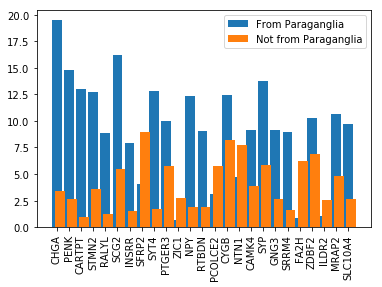

For class Endometrium


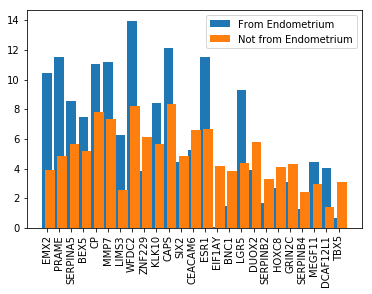

For class Brain


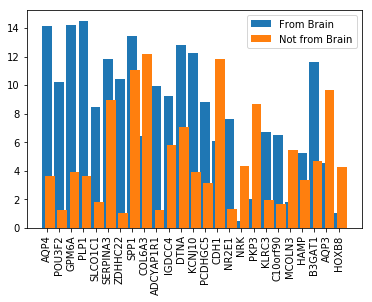

For class Thyroid Gland


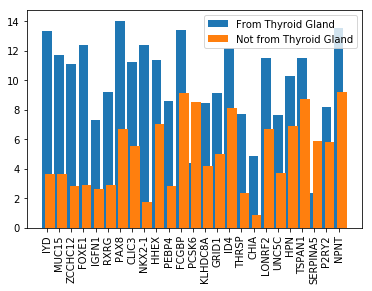

For class Lung


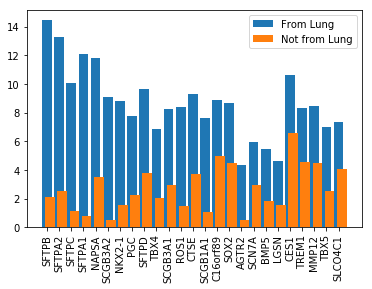

For class Skin


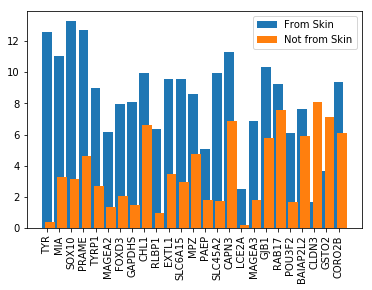

For class Esophagus


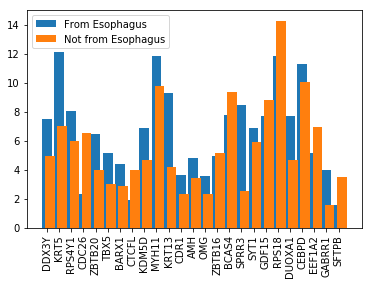

For class Pancreas


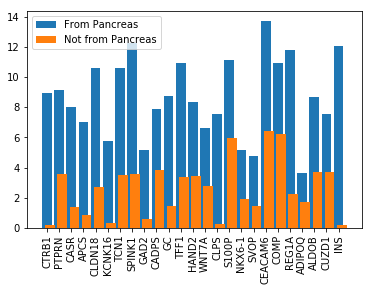

For class Kidney


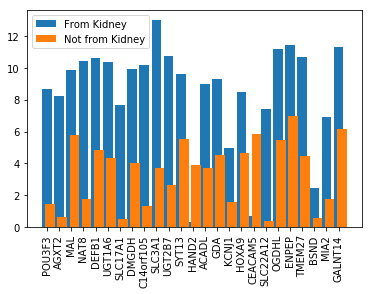

In [41]:
# A few examples, here it's from a normal logistic regression on tissue type:


show_features('./testing123/dataset=tcga-tissue_batch_size=100_num_channel=128_seed=1993_weight_decay=0.0_l1_loss=0.0_not_norm_adj=False_scale_free=False_epoch=10_num_layer=0_lr=0.01_model=cgn_train_ratio=0.8_momentum=0.9',
             data_tissue)

For layer 0
For class Infiltrating Ductal Carcinoma


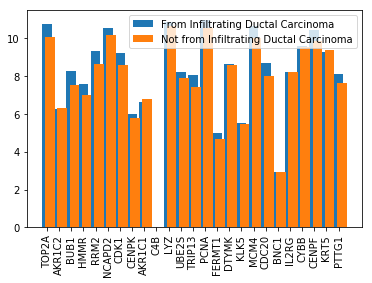

For class Infiltrating Lobular Carcinoma


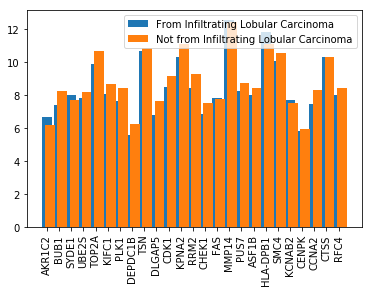

In [48]:
# Here from a small cgn on breast cancer:
show_features('./testing123/dataset=tcga-brca_nb_per_class=10_batch_size=100_num_channel=8_seed=1993_weight_decay=0.0_l1_loss=0.0_not_norm_adj=False_scale_free=False_epoch=100_num_layer=1_lr=0.001_model=cgn_nb_class=2_train_ratio=0.8_momentum=0.9',
             data_brca)


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database',)).History will not be written to the database.
For layer 0
For class Infiltrating Ductal Carcinoma


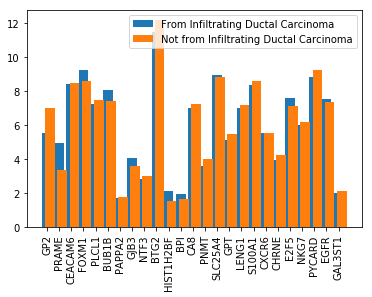

For class Infiltrating Lobular Carcinoma


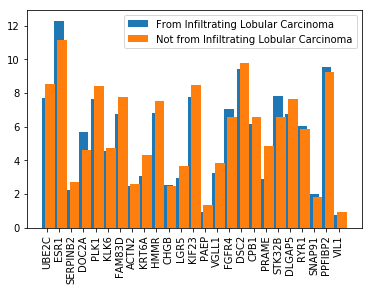

For layer 1
For class Infiltrating Ductal Carcinoma


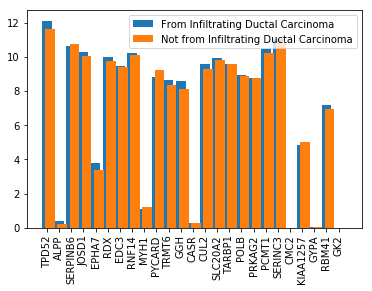

For class Infiltrating Lobular Carcinoma


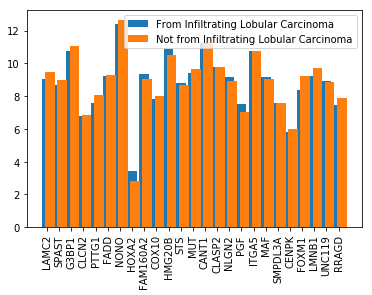

For layer 2
For class Infiltrating Ductal Carcinoma


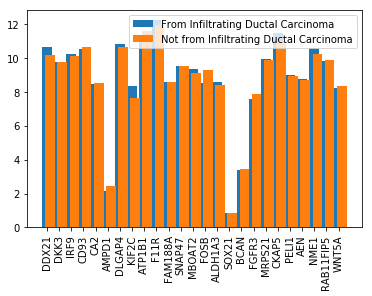

For class Infiltrating Lobular Carcinoma


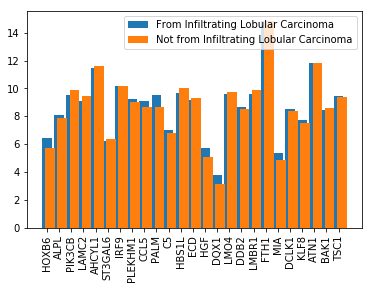

In [50]:
# Here from a small cgn on breast cancer:
show_features('./testing123/dataset=tcga-brca_nb_per_class=10_batch_size=100_num_channel=8_seed=1993_weight_decay=0.0_l1_loss=0.0_not_norm_adj=False_scale_free=False_epoch=10_num_layer=2_lr=0.001_model=cgn_nb_class=2_train_ratio=0.8_momentum=0.9',
             data_brca)
